#Hopfield Networks

Let us first create a class for Hopfield networks

In [77]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        for pattern in patterns:
            pattern = np.array(pattern).reshape(self.num_neurons, 1)
            self.weights += np.dot(pattern, pattern.T)
        np.fill_diagonal(self.weights, 0)  # No self-connections
        self.weights /= self.num_neurons

    def retrieve(self, pattern, max_iterations=10, threshold=0):
        pattern = np.array(pattern).reshape(self.num_neurons, 1)
        energy_history = [] # to save the energy at each step
        for _ in range(max_iterations):
            new_pattern = np.sign(np.dot(self.weights, pattern))
            energy = -0.5 * np.dot(pattern.T, np.dot(self.weights, pattern))[0, 0]
            energy_history.append(energy)
            if np.array_equal(new_pattern, pattern):
                break
            pattern = new_pattern
        return pattern.flatten(), energy_history

## Examples

---

For example we take two patterns T and I. Then we will add some noise close to T and try to retrive T using hopfield networks

In [119]:
pattern_1 = np.array([1, 1, 1, -1, 1, -1, -1, 1, -1])
pattern_2 = np.array([-1, 1, -1, -1, 1, -1, -1, 1, -1])
noisy_pattern = np.array([1, -1, 1, -1, 1, -1, -1, 1, -1])

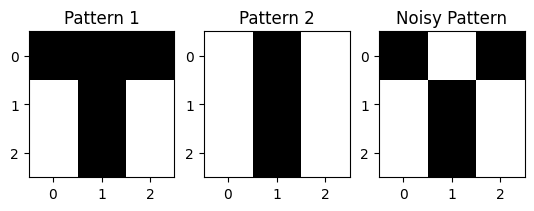

In [120]:
f, ax = plt.subplots(1,3)
ax[0].imshow(pattern_1.reshape(3,3),cmap='binary');
ax[1].imshow(pattern_2.reshape(3,3),cmap='binary');
ax[2].imshow(noisy_pattern.reshape(3,3),cmap='binary');
ax[0].set_title("Pattern 1");
ax[2].set_title("Noisy Pattern");
ax[1].set_title("Pattern 2");


## Learning

In [86]:
# Example patterns
patterns = [ pattern_1,pattern_2]
network = HopfieldNetwork(9) #number of neurons
network.train(patterns)

## Retrieveal

In [ ]:
#Test retrieval with a noisy 'L' pattern
noisy_pattern = noisy_pattern
# retreve the pattern
retrieved_pattern, energy_history = network.retrieve(noisy_pattern)

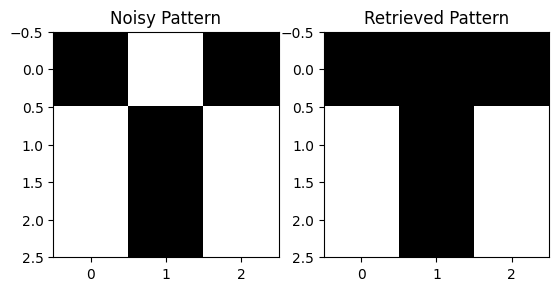

In [122]:
f, ax = plt.subplots(1,2)
ax[0].imshow(noisy_pattern.reshape(3,3),cmap='binary');
ax[1].imshow(retrieved_pattern.reshape(3,3),cmap='binary');
ax[0].set_title("Noisy Pattern");
ax[1].set_title("Retrieved Pattern");
